# サポートベクターマシン

finish 1
[-0.50834798 -0.36504624]
2.3155691126402975


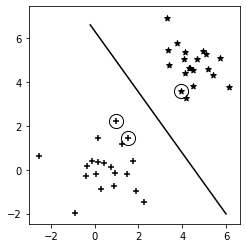

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import svm_hard

plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(20, 2)
X1 = np.random.randn(20, 2) + np.array([5,5])
y = np.array([1] * 20 + [-1] * 20)

X = np.r_[X0, X1]

model = svm_hard.SVC()
model.fit(X, y)

plt.scatter(X0[:, 0], X0[:, 1], color='k', marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color='k', marker="*")

def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

x1 = -0.2
x2 = 6
plt.plot([x1, x2], [f(model, x1), f(model, x2)], color='k')
plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=200, color=(0,0,0,0), edgecolor='k', marker='o')
plt.show()

[0.5856234 1.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 1.        0.        0.        0.        1.        0.        1.
 0.        0.        0.        0.5856234 0.        1.        0.
 0.        0.        0.        1.        0.        0.        0.
 0.        0.        0.        0.        0.       ]
[-0.87153956 -1.15837854]
3.1044708589388295
正しく分類できた数: 37


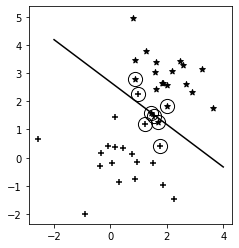

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import svm_soft

plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(20, 2)
X1 = np.random.randn(20, 2) + np.array([2.5, 3])
y = np.array([1] * 20 + [-1] * 20)

X = np.r_[X0, X1]

model = svm_soft.SVC()
model.fit(X, y)

plt.scatter(X0[:, 0], X0[:, 1], color='k', marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color='k', marker="*")

def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

x1 = -2
x2 = 4
plt.plot([x1, x2], [f(model, x1), f(model, x2)], color='k')
print("正しく分類できた数:", (model.predict(X) == y).sum())
plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=200, color=(0,0,0,0), edgecolor='k', marker='o')

def f(model, xx):
    return model.w0_ + np.dot(model.w_, xx)

plt.show()

正しく分類できた数: 193


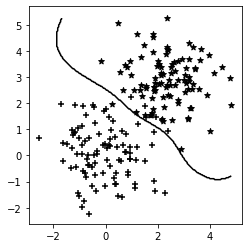

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import svm

plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(100, 2)
X1 = np.random.randn(100, 2) + np.array([2.5, 3])
y = np.array([1] * 100 + [-1] * 100)
X = np.r_[X0, X1]

model = svm.SVC()
model.fit(X, y)

xmin,  xmax = X[:, 0].min(), X[:, 0].max()
ymin, ymax = X[:, 1].min(), X[:, 1].max()

plt.scatter(X0[:, 0], X0[:, 1], color='k', marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color='k', marker="*")
xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))

Z = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)

plt.contour(xmesh, ymesh, Z, levels=[0], colors='k')
print("正しく分類できた数:", (model.predict(X) == y).sum())
plt.show()